In [1]:
from ngsolve import *
from ngsolve.meshes import Make1DMesh
from ngsolve.webgui import Draw
import numpy as np
import math

In [2]:
from sympy import symbols, simplify, solve, diff, lambdify
import sympy as sym
from sympy import Symbol
import scipy.integrate
import matplotlib.pyplot as plt
mesh = Make1DMesh(100)

X,T = symbols("x t")

u_x = X*(1-X)*sym.sin(4*sym.pi*X)*T**2*sym.exp(-T)

u_diff_x = diff(u_x, X)

u_ddiff_x = diff(u_diff_x,X)

u_dddiff_x = diff(u_ddiff_x,X)

u_ddddiff_x = diff(u_dddiff_x,X)

u_diff_t = diff(u_x, T)

u_ddiff_t = diff(u_diff_t,T)

f_x_t = u_ddddiff_x + u_ddiff_t

f = (T**2*X*(1-X) + 256*sym.pi**4*T**2*X*(1-X) + 192*sym.pi**2*T**2 - 4*T*X*(1-X) + 2*X*(1-X))*(sym.exp(-T)*sym.sin(4*sym.pi*X)) \
                      + (2*X - 1)*256*sym.pi**3*T**2*sym.exp(-T)*sym.cos(4*sym.pi*X)



In [3]:
u = H1(mesh, order=2, dirichlet="left|right")
sigma = H1(mesh, order=2, dirichlet=" ")
u_1 = NumberSpace(mesh)
fesm = u*sigma*u_1

In [4]:
u, sigma, u_1= fesm.TrialFunction()
v, tau, v_1 = fesm.TestFunction()

time = 0.0
dt = 0.5

In [5]:
a = BilinearForm(fesm, symmetric=False)
a += -grad(sigma)*grad(v)*dx + sigma*tau*dx + grad(u)*grad(tau)*dx -u_1*v_1*dx
a.Assemble()

m = BilinearForm(fesm, symmetric=False)
m += u_1*v*dx - u*v_1*dx
m.Assemble()

In [6]:
mstar = m.mat.CreateMatrix()
mstar.AsVector().data = m.mat.AsVector() + dt * a.mat.AsVector()
invmstar = mstar.Inverse(freedofs=fesm.FreeDofs())

In [7]:
t = Parameter(0.0)

In [8]:
gausspt =(t**2*x*(1-x) + 256*pi**4*t**2*x*(1-x) + 192*pi**2*t**2 - 4*t*x*(1-x) + 2*x*(1-x))*(exp(-t)*sin(4*pi*x)) \
                      + (2*x - 1)*256*pi**3*t**2*exp(-t)*cos(4*pi*x) 

gfu = GridFunction(fesm)
ft = LinearForm(fesm)
ft += gausspt*v*dx
time = 0.0
t.Set(0.0)
gfu.components[2].Set(0.0)
gfu.components[0].Set(0.0)

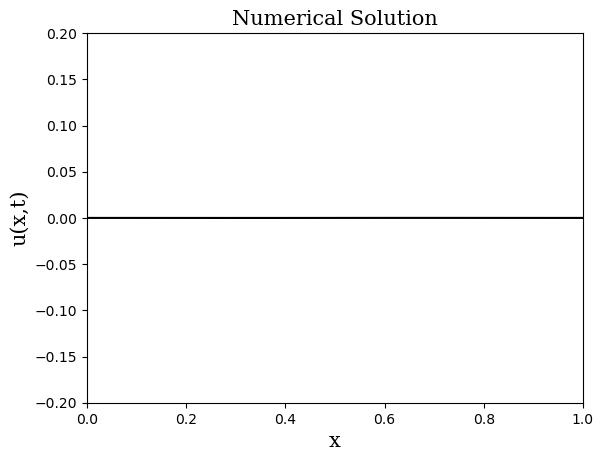

 0.5

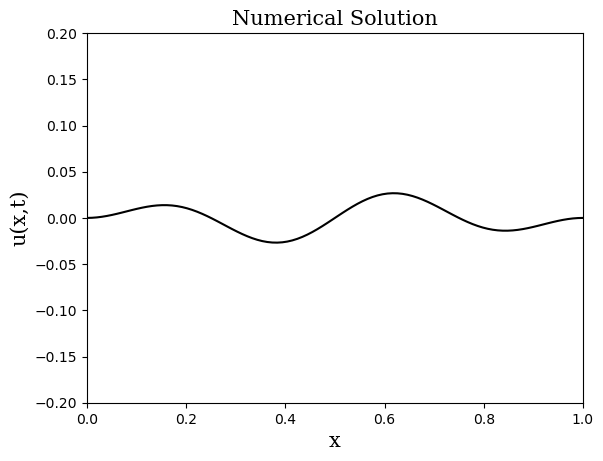

 1.0

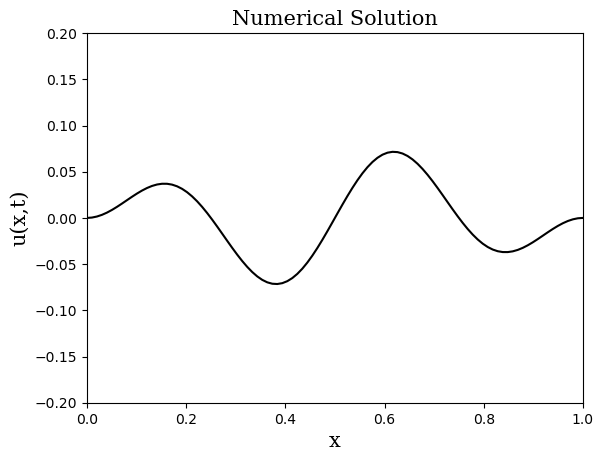

 1.5

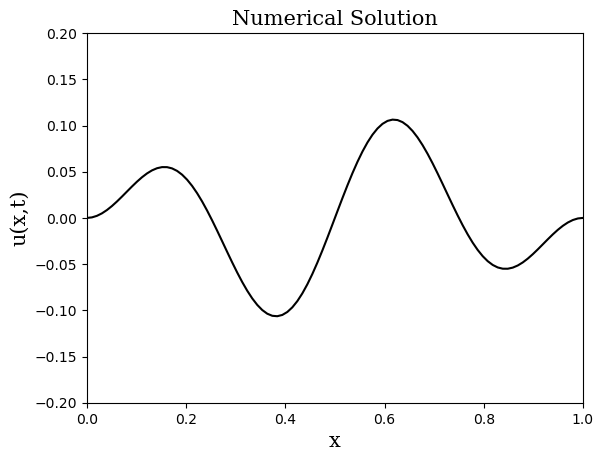

 2.0

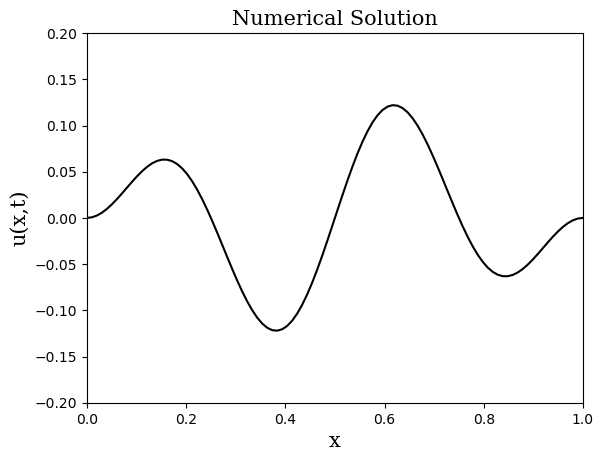

 2.5

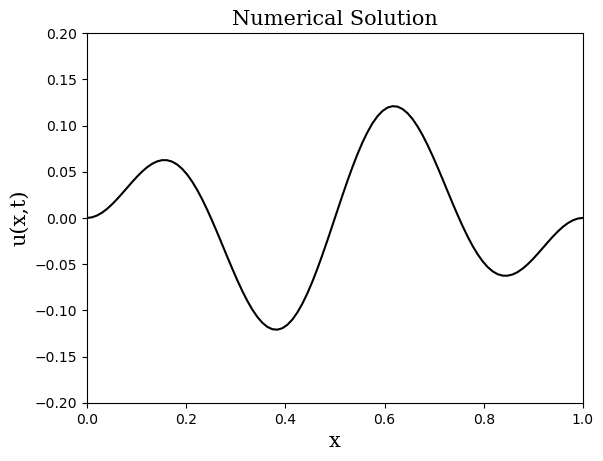

 3.0

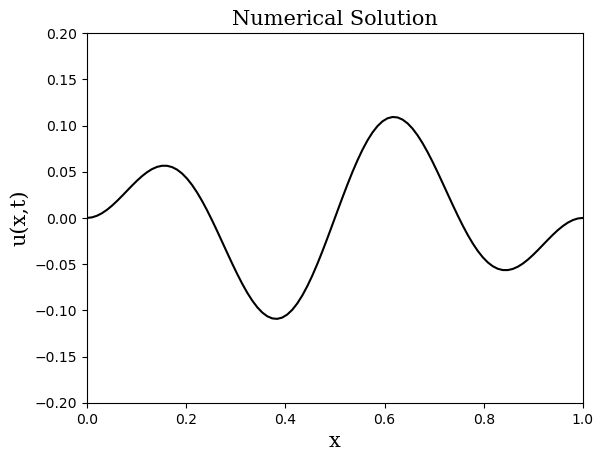

 3.5

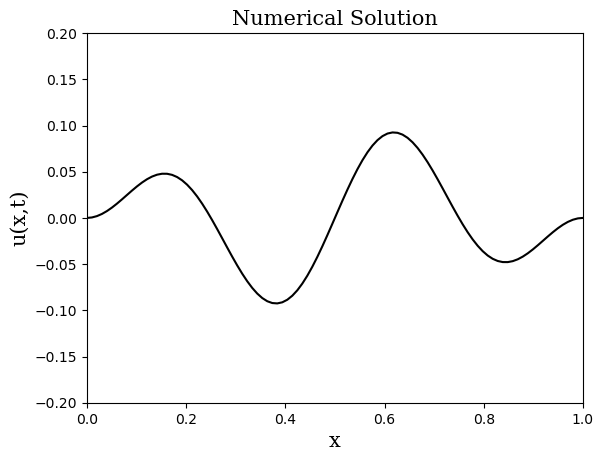

 4.0

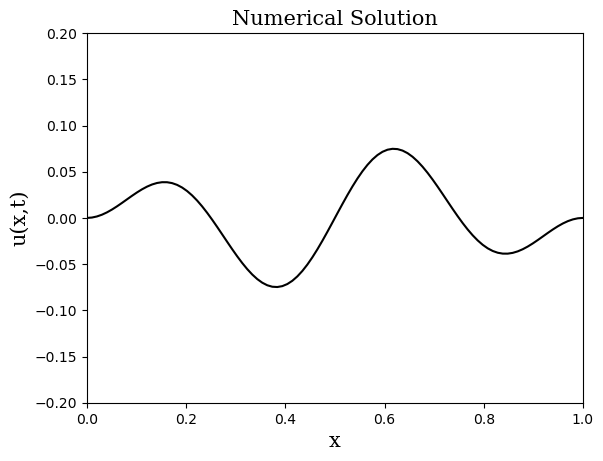

 4.5

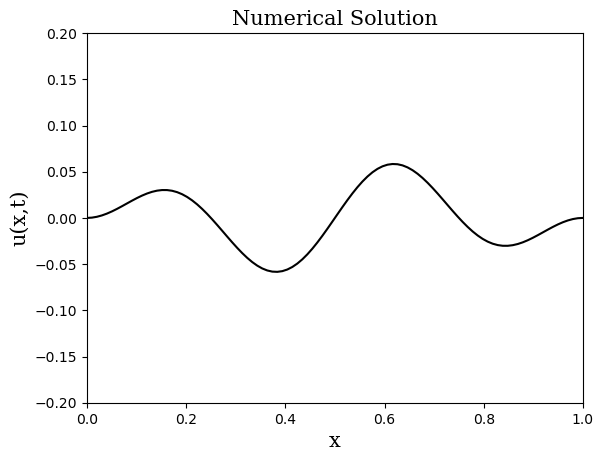

 5.0

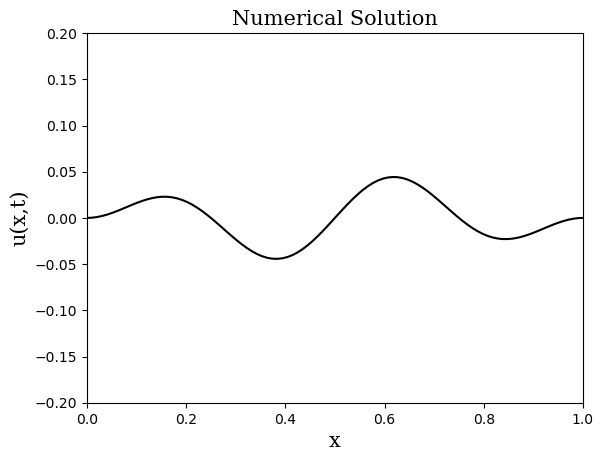

 5.5

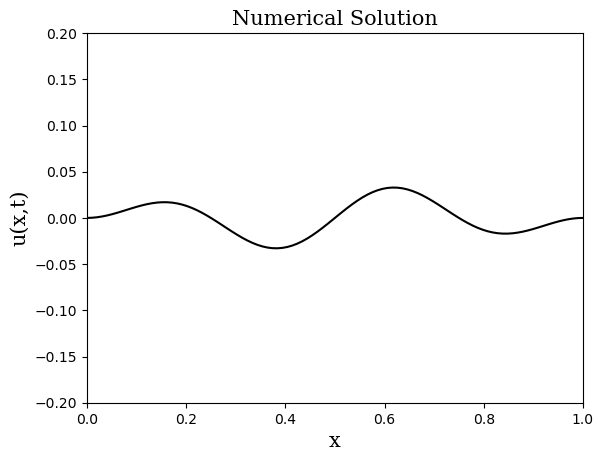

 6.0

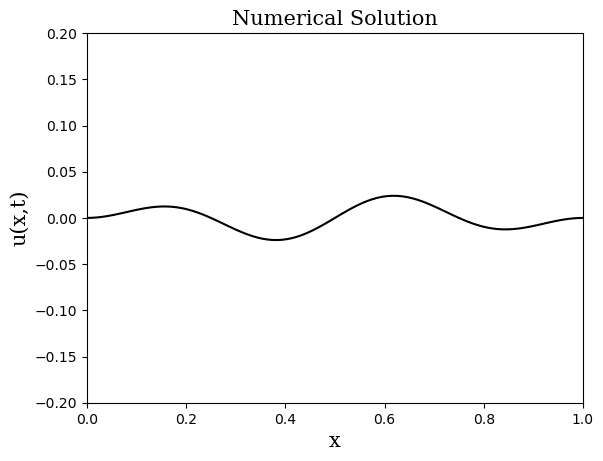

 6.5

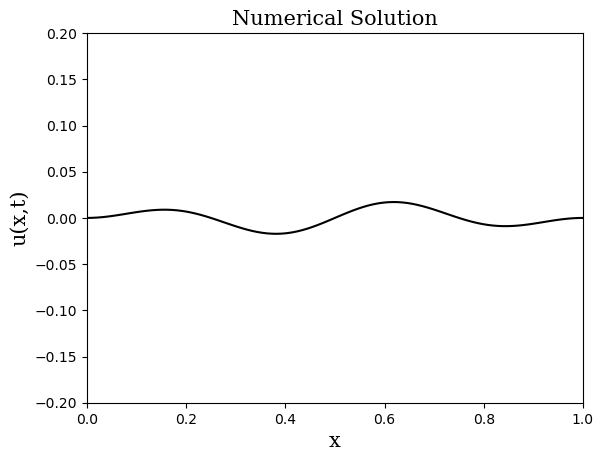

 7.0

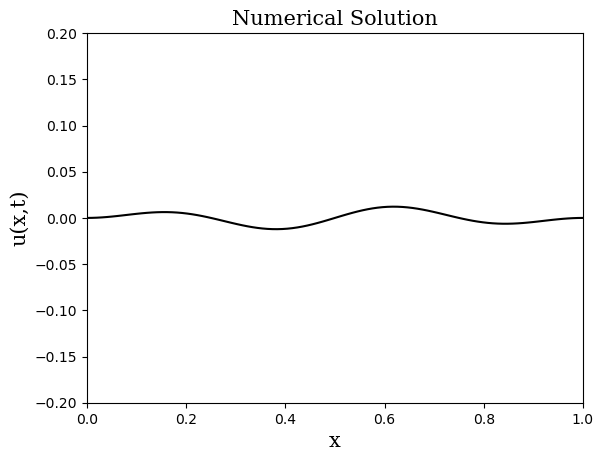

 7.5

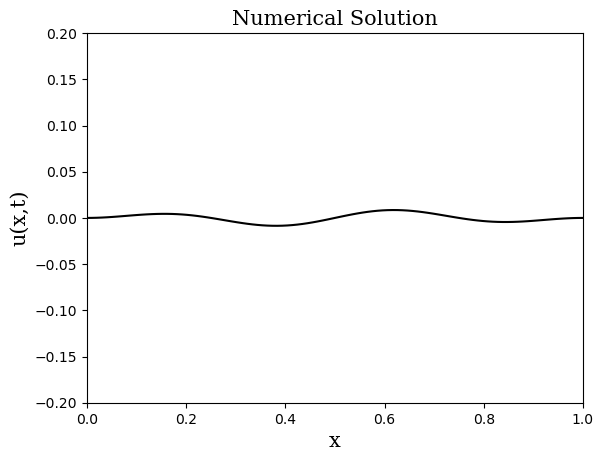

 8.0

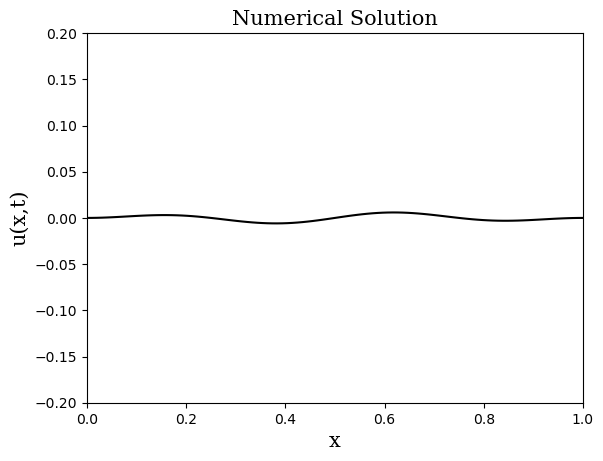

 8.5

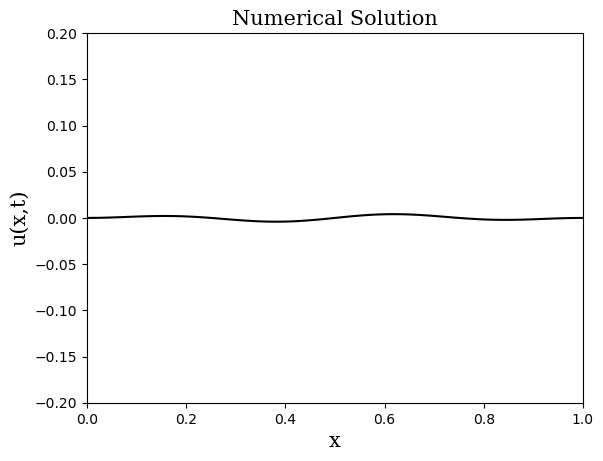

 9.0

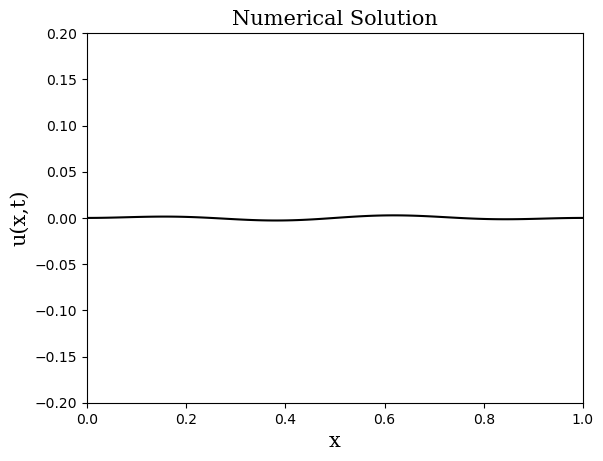

 9.5

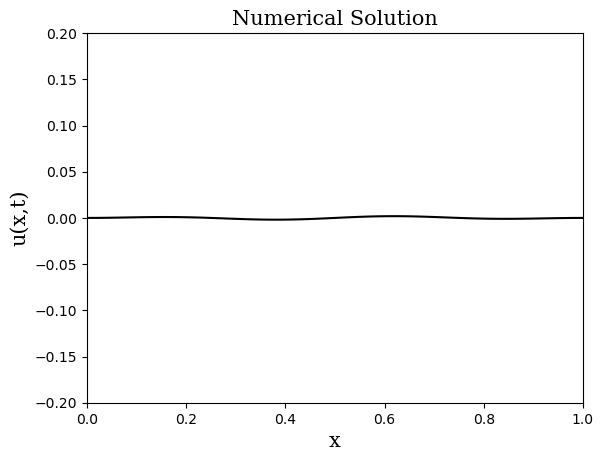

 10.0


In [9]:
mesh = Make1DMesh(80)
x=np.linspace(0,1,100)
gfu.components[0](mesh(x))

tstep = 10 # time that we want to step over within one block-run
t_intermediate=0 # time counter within one block-run
res = gfu.vec.CreateVector()
while t_intermediate < tstep - 0.5 * dt:
    t.Set(time+t_intermediate)
    ft.Assemble()
    k_1 = invmstar*(ft.vec - a.mat*gfu.vec)
    k_2 = invmstar*(ft.vec-a.mat*(gfu.vec + dt/2*k_1))
    gfu.vec.data = gfu.vec + dt/2*(k_1 +k_2)
    t_intermediate += dt
    plt.ylim([-0.2, 0.2])
    plt.xlim([0, 1])
    font1 = {'family':'serif','color':'black','size':15}
    plt.title("Numerical Solution",fontdict = font1)
    plt.xlabel('x',fontdict = font1)
    plt.ylabel('u(x,t)',fontdict = font1)
    plt.plot(x,gfu.components[0](mesh(x)),color='black',linestyle="-")
    plt.show()
    print("\r",time+t_intermediate,end="")
#     scene.Redraw()
print("")
time+=t_intermediate